In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data

In [3]:
df = pd.read_csv("../data/steam_games_cleaned.csv")
df.head()

,AppID,Name,Estimated owners,Peak CCU,Required age,Price,Discount,DLC count,About the game,Windows,...,Average playtime forever,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,Release year
0,20200,Galactic Bowling,0 - 20000,0,0,19.99,0,0,Galactic Bowling is an exaggerated and stylize...,True,...,0,0,0,0,Perpetual FX Creative,Perpetual FX Creative,"Single-player,Multi-player,Steam Achievements,...","Casual,Indie,Sports","Indie,Casual,Sports,Bowling",2008
1,655370,Train Bandit,0 - 20000,0,0,0.99,0,0,THE LAW!! Looks to be a showdown atop a train....,True,...,0,0,0,0,Rusty Moyher,Wild Rooster,"Single-player,Steam Achievements,Full controll...","Action,Indie","Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc...",2017
2,1732930,Jolt Project,0 - 20000,0,0,4.99,0,0,Jolt Project: The army now has a new robotics ...,True,...,0,0,0,0,Campião Games,Campião Games,Single-player,"Action,Adventure,Indie,Strategy",Unknown,2021
3,1355720,Henosis™,0 - 20000,0,0,5.99,0,0,HENOSIS™ is a mysterious 2D Platform Puzzler w...,True,...,0,0,0,0,Odd Critter Games,Odd Critter Games,"Single-player,Full controller support","Adventure,Casual,Indie","2D Platformer,Atmospheric,Surreal,Mystery,Puzz...",2020
4,1139950,Two Weeks in Painland,0 - 20000,0,0,0.00,0,0,ABOUT THE GAME Play as a hacker who has arrang...,True,...,0,0,0,0,Unusual Games,Unusual Games,"Single-player,Steam Achievements","Adventure,Indie","Indie,Adventure,Nudity,Violent,Sexual Content,...",2020


## Average Price

In [39]:
print(f'The average price of a game on steam is ${df["Price"].mean():.2f}!')
print(f'The standard deviation of prices is ${df["Price"].std():.2f}.')

The average price of a game on steam is $7.06!
The standard deviation of prices is $12.56.


Since the standard deviation is so large, we infer there are outliers in the data that pull the average price up.

In [43]:
df[df["Price"] == df["Price"].max()][['Name', 'Price', 'About the game']]

,Name,Price,About the game
81765,The Leverage Game,999.98,The Leverage Game is a board game in which pla...
82835,The Leverage Game Business Edition,999.98,The Leverage Game is a board game in which pla...


 Upon analysis we find that 'The Leverage Game' is $1000!

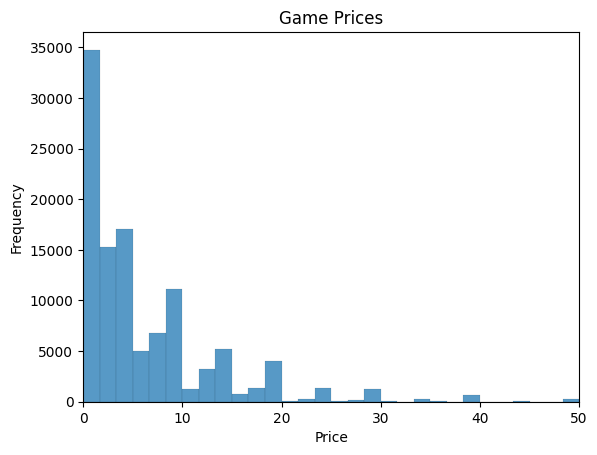

In [37]:
sns.histplot(df["Price"].dropna(), bins=600, kde=False)
plt.title('Game Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.xlim(0, 50)
plt.show()

Most games are below $5.

## Game Description Analysis

What words/phrases to publishers use to market their games?

In [17]:
words_dict = {}

for desc in df["About the game"]:
    words = str(desc).lower().strip(" !.,").split()
    for word in words:
        if word not in words_dict:
            words_dict[word] = 0
        words_dict[word] += 1

top_words = sorted(words_dict.items(), key=lambda item: item[1], reverse=True)[:500]

### Most Common Words

In [18]:
not_interesting = ['']

# Display the top 500 words
for word, count in top_words:
    print(f"{word}: {count}")

the: 1159904
and: 773895
to: 666841
a: 525960
of: 524395
you: 377980
in: 327479
your: 315510
is: 243892
with: 243500
for: 161979
game: 156406
as: 135744
will: 135489
on: 128310
that: 125425
can: 123463
-: 111064
are: 107110
this: 100384
or: 100210
be: 99930
from: 94099
an: 92260
by: 91096
it: 75698
have: 69129
all: 69109
new: 65218
each: 58895
more: 57003
but: 56834
their: 54426
at: 52539
different: 49011
play: 48838
up: 48203
world: 47689
through: 46488
has: 46132
into: 45481
not: 43128
one: 41465
get: 40922
unique: 40465
find: 40034
use: 38429
if: 36895
where: 36496
them: 36163
players: 35554
his: 34826
they: 34768
time: 34704
who: 34694
make: 34677
out: 33901
own: 32937
there: 32859
which: 31734
features: 30772
story: 30189
only: 30183
every: 30015
other: 29768
take: 29753
her: 28992
also: 28603
experience: 28597
no: 28576
what: 28371
when: 27811
so: 27618
about: 27536
like: 27181
over: 27169
player: 26592
way: 26330
levels: 25693
we: 25301
some: 25293
explore: 24360
many: 23960
he:

This list of words doesn't seem to be that interesting. Its mostly muddled with basic english words like 'the' and 'to' but if you look down the list you begin to see words like game, new, more, different, play, up, and world.

Now we look at common phrases. Here we define a 'phrase' as a combination of 2 to 5 words.

### Most Common Phrases

In [29]:
def get_phrases(text, n):
    words = text.lower().strip(" !.,").split()
    return [" ".join(words[i:i+n]) for i in range(len(words) - n + 1)]

for length in [3, 4, 5, 6, 7]:
    words_dict = {}
    for desc in df["About the game"]:
        desc_str = str(desc)
        phrases = get_phrases(desc_str, length)
        for phrase in phrases:
            if phrase not in words_dict:
                words_dict[phrase] = 0
            words_dict[phrase] += 1

    top_phrases = sorted(words_dict.items(), key=lambda item: item[1], reverse=True)[:20]

    print(f"\nTop Phrases of Length: {length}\n")
    for phrase, count in top_phrases:
        print(f"{phrase}: {count}")



Top Phrases of Length: 3

the game is: 8195
a variety of: 8009
be able to: 7146
in order to: 6992
you have to: 6508
you need to: 6473
this is a: 6306
of the game: 6121
as well as: 5793
one of the: 5544
this game is: 5465
in the game: 4750
the world of: 4668
a lot of: 4512
you will be: 4419
you want to: 4335
you will have: 4183
will have to: 4162
your way through: 4057
the end of: 3590

Top Phrases of Length: 4

you will have to: 2898
will be able to: 2590
each with their own: 2081
at the end of: 1919
the end of the: 1830
of the game is: 1795
up to you to: 1712
you will be able: 1687
you will need to: 1668
if you want to: 1659
are you ready to: 1629
the role of a: 1587
on the role of: 1557
take on the role: 1371
immerse yourself in the: 1355
this game is a: 1345
with the help of: 1316
your goal is to: 1304
you play as a: 1275
a wide variety of: 1173

Top Phrases of Length: 5

you will be able to: 1662
take on the role of: 1363
will you be able to: 1025
have what it takes to: 958
you ha

# Device Compatibility Analysis

Comparing game availability on Windows, Mac, and Linux

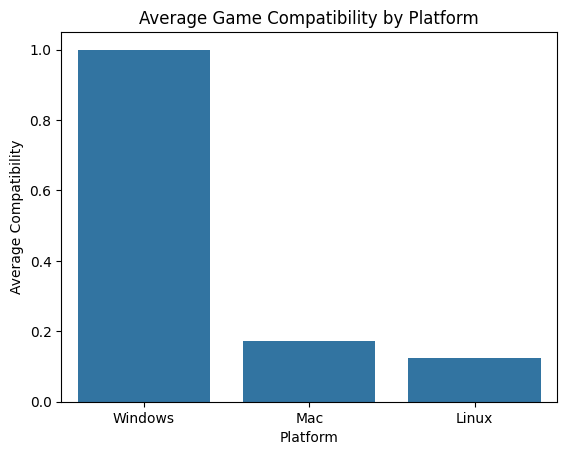

In [22]:
avg_compatibility = {
    'Platform': ['Windows', 'Mac', 'Linux'],
    'Average Compatibility': [
        df['Windows'].mean(),
        df['Mac'].mean(),
        df['Linux'].mean()
    ]
}

compatibility_df = pd.DataFrame(avg_compatibility)
sns.barplot(x='Platform', y='Average Compatibility', data=compatibility_df)
plt.title('Average Game Compatibility by Platform')
plt.ylabel('Average Compatibility')
plt.show()

If you want to game on steam, you should buy a Windows computer.

# How has the number of published games changed over time?

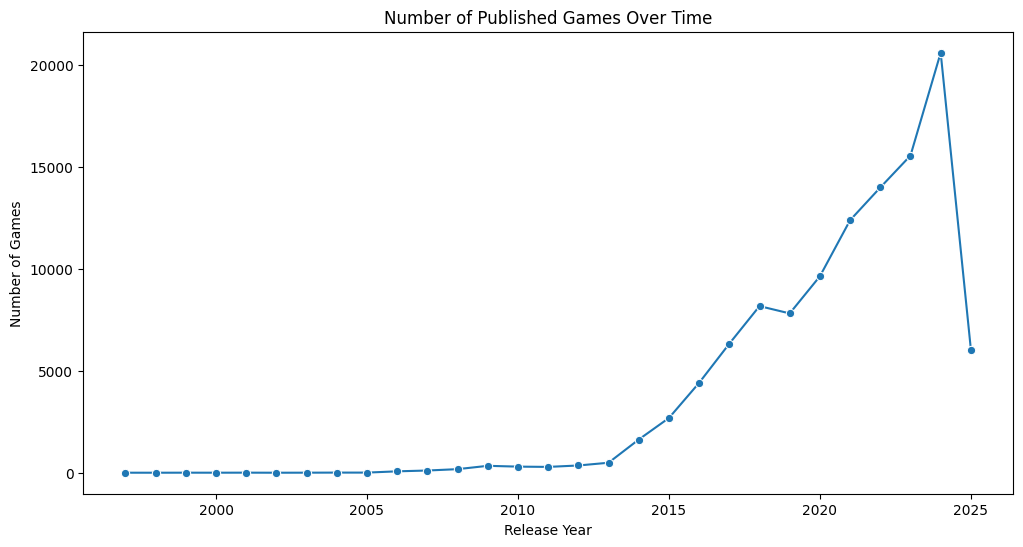

In [32]:
year_counts = df['Release year'].value_counts().sort_index()

# Convert to DataFrame for seaborn plotting
year_counts_df = year_counts.reset_index()
year_counts_df.columns = ['Year', 'Number of Games']

# Plot the number of games published over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Number of Games', data=year_counts_df, marker='o')

plt.title('Number of Published Games Over Time')
plt.xlabel('Release Year')
plt.ylabel('Number of Games')
plt.show()

The number of games published on Steam is increasing exponentially. There is a dip in 2025 since the year is not over yet and the data is 5 months out of date.